In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
claims_data = pd.read_csv('claims.csv')
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [113]:
cust_data = pd.read_csv('cust_demographics.csv')
cust_data = cust_data.rename(columns={'CUST_ID': 'customer_id'})
cust_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [114]:
data = pd.merge(cust_data,claims_data,on='customer_id')
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.

In [115]:
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'])
data['claim_date'] = pd.to_datetime(data['claim_date'])
data['DateOfBirth'] = data['DateOfBirth'].apply(lambda x: (x - timedelta(days = (365.25 * 100))) if x.year > datetime.today().year else x)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
customer_id            1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(10)
memory usage: 135.6+ KB


3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.

In [116]:
data['claim_amount'] = data['claim_amount'].apply(lambda x: float(str(x).replace("$",'')))

In [117]:
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.

In [118]:
data.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [119]:
data['flag'] = data['police_report'].apply(lambda x: 0 if x == 'Yes' else 1)
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,1
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1


5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique.
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [120]:
data.shape

(1085, 16)

In [121]:
data = data.drop_duplicates(subset='customer_id', keep='first')
data.shape

(1078, 16)

6. Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
customer_id            1078 non-null int64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1078 non-null int64
incident_cause         1078 non-null object
claim_date             1078 non-null datetime64[ns]
claim_area             1078 non-null object
police_report          1078 non-null object
claim_type             1078 non-null object
claim_amount           1013 non-null float64
total_policy_claims    1068 non-null float64
fraudulent             1078 non-null object
flag                   1078 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 143.2+ KB


In [123]:
mean = data.claim_amount.mean()
data['claim_amount']  = data.claim_amount.fillna(mean)

data['total_policy_claims'] =  data.total_policy_claims.fillna(data.total_policy_claims.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
customer_id            1078 non-null int64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1078 non-null int64
incident_cause         1078 non-null object
claim_date             1078 non-null datetime64[ns]
claim_area             1078 non-null object
police_report          1078 non-null object
claim_type             1078 non-null object
claim_amount           1078 non-null float64
total_policy_claims    1078 non-null float64
fraudulent             1078 non-null object
flag                   1078 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 143.2+ KB


In [124]:
from datetime import datetime, timedelta

In [125]:
data['age'] = data['DateOfBirth'].apply(lambda x: int(((datetime.today() - x).days)/365.25))
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,40
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,49
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1,35
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1,33
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1,42


In [126]:
def AgeCategoriser(x):
    if x < 18:
        return "Children"
    elif x < 30:
        return "Youth"
    elif x < 60:
        return "Adult"
    else:
        return "Senior"

data['age_group'] = data['age'].apply(AgeCategoriser)
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,40,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,49,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1,35,Adult
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1,33,Adult
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1,42,Adult


8. What is the average amount claimed by the customers from various
segments?

In [129]:
data.groupby(by='Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

In [134]:
d = datetime.strptime('01/10/2018','%d/%m/%Y')
d = d - timedelta(days=20)
df1 = data[data['claim_date'] < d]
df1.groupby(by='incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.244625e+05
Driver error,3.264286e+06
Natural causes,1.312706e+06
Other causes,3.725038e+06
Other driver error,3.318806e+06


10. How many adults from TX, DE and AK claimed insurance for driver
related issues and causes?

In [144]:
df2 = data[(data['State'] == 'TX') | (data['State'] == 'DE') | (data['State'] == 'AK')]
df2 = df2[(df2['age_group'] == 'Adult') & ((df2['incident_cause'] == 'Driver error') | ((df2['incident_cause'] == 'Other driver error')))]
print("{} adults from TX, DE and AK claimed insurance for driver related issues and causes.".format(df2.shape[0]))

25 adults from TX, DE and AK claimed insurance for driver related issues and causes.


11. Draw a pie chart between the aggregated value of claim amount based
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

In [149]:
agg1 = data.groupby(by='gender')[['claim_amount']].sum()
agg2 = data.groupby(by='Segment')[['claim_amount']].sum()

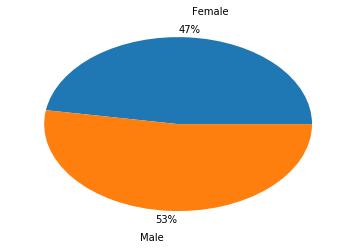

In [164]:
plt.pie(agg1, labels=agg1.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.show()

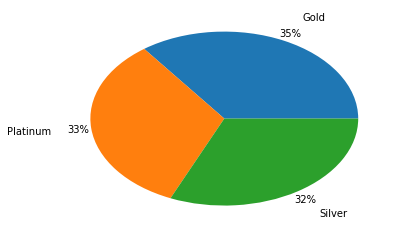

In [166]:
plt.pie(agg2, labels=agg2.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.show()

12. Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart

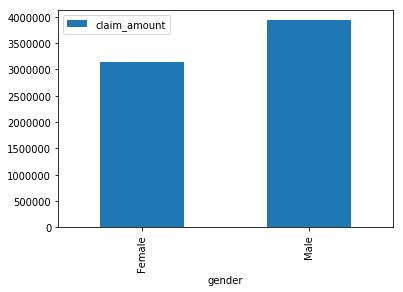

In [172]:
df3 = data[(data['incident_cause'] == 'Driver error') | (data['incident_cause'] == 'Other driver error')]
df3 = df3.groupby(by='gender')[['claim_amount']].sum()
df3.plot(kind='bar')
plt.show()

In [173]:
print("Male have claimed most for driver related issues.")

Male have claimed most for driver related issues.


13. Which age group had the maximum fraudulent policy claims? Visualize
it on a bar chart.

In [174]:
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,40,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,49,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1,35,Adult
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1,33,Adult
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1,42,Adult


In [182]:
count = data.groupby(by=['fraudulent','age_group'])[['customer_id']].count()

In [185]:
df4 = count.loc['Yes']

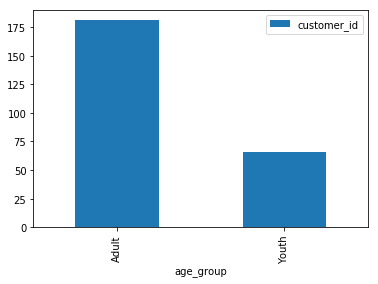

In [187]:
df4.plot(kind='bar')
plt.show()

In [188]:
print("Adult has the maximum fraudulent claims.")

Adult has the maximum fraudulent claims.


14. Visualize the monthly trend of the total amount that has been claimed
by the customers. Ensure that on the “month” axis, the month is in a
chronological order not alphabetical order.

In [189]:
data['month'] = data['claim_date'].dt.strftime("%B")
data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_group,month
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,40,Adult,November
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,49,Adult,October
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1,35,Adult,February
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1,33,Adult,June
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1,42,Adult,January


In [192]:
df5 = data.groupby(by='month')[['claim_amount']].sum()
df5

,claim_amount
month,
April,1.276071e+06
August,9.112035e+05
December,6.967015e+05
February,1.133107e+06
January,1.332012e+06
July,1.379035e+06
June,1.276333e+06
March,1.320094e+06
May,1.114211e+06


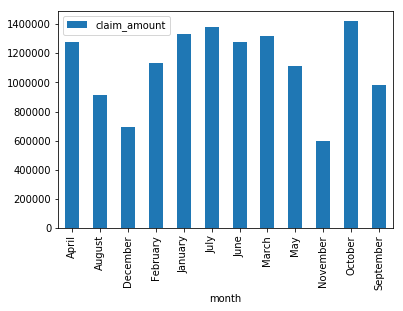

In [194]:
df5 = df5.sort_index()
df5.plot(kind='bar')
plt.show()